In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd '/content/drive/MyDrive/athul assesemnt programming'

/content/drive/MyDrive/athul assesemnt programming


In [ ]:
%ls

animation_eda.json      PRSA_Data_Aotizhongxin_20130301-20170228.csv
animation_home.json     PRSA_Data_Changping_20130301-20170228.csv
animation_predict.json  PRSA_Data_Dingling_20130301-20170228.csv
app.py                  PRSA_Data_Dongsi_20130301-20170228.csv
feature_names.pkl       PRSA_Data_Huairou_20130301-20170228.csv
knn_model.pkl           rf_model.pkl
lr_model.pkl            scaler.pkl
merged_data.csv


In [ ]:
# Task1_DataHandling.ipynb

import pandas as pd
import os

data_files = {
    'Dongsi': 'PRSA_Data_Dongsi_20130301-20170228.csv',        # Urban
    'Changping': 'PRSA_Data_Changping_20130301-20170228.csv',  # Suburban
    'Huairou': 'PRSA_Data_Huairou_20130301-20170228.csv',      # Rural
    'Aotizhongxin': 'PRSA_Data_Aotizhongxin_20130301-20170228.csv'  # Industrial
}

dataframes = []

for station, filepath in data_files.items():
    df = pd.read_csv(filepath)
    df['Station'] = station
    dataframes.append(df)


merged_df = pd.concat(dataframes, axis=0, ignore_index=True)

output_path = os.path.join('merged_data.csv')
merged_df.to_csv(output_path, index=False)

print(f"✅ Merged dataset created successfully with shape: {merged_df.shape}")
merged_df.head()


✅ Merged dataset created successfully with shape: (140256, 19)


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,Station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi,Dongsi
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi,Dongsi


KEY INSIGHTS : The code reads air quality data from a list of different stations, gives each data its respective station label, joins them all together in one DataFrame, and stores the combined data into a CSV file.


Dongsi (Urban)

Situated in downtown Beijing, this station indicates air quality in urban and highly congested areas.

It helps in assessing pollution from autos, residential heating, and daily human activities.

Changping (Suburban)

Situated in an in-between location between the urban center and suburbs, Changping measures pollution dispersion from the city center and suburban emissions.

It helps in assessing how urban pollution disperses and how suburban expansion influences air quality.

Huairou (Rural)

Located in a less industrialized region with lower population density, this station provides a baseline of background air quality.

Theoretical for measuring natural vs. anthropogenic (human-created) pollution.

Aotizhongxin (Industrial)

Located near industrial regions, this station measures emission from factories, power plants, and heavy industry.

Theoretical for monitoring industrial sources of pollution and their effect on surrounding areas.

In [ ]:
# Task2_EDA.ipynb

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

df = pd.read_csv('merged_data.csv')

print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print("\nMissing Values:\n", df.isnull().sum())
print("\nData Types:\n", df.dtypes)
df.head()

Shape: (140256, 19)
Columns: ['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station', 'Station']

Missing Values:
 No            0
year          0
month         0
day           0
hour          0
PM2.5      3402
PM10       2630
SO2        3206
NO2        4930
CO         7916
O3         4138
TEMP        144
PRES        143
DEWP        146
RAIN        146
wd          601
WSPM        120
station       0
Station       0
dtype: int64

Data Types:
 No           int64
year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd          object
WSPM       float64
station     object
Station     object
dtype: object


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,Station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi,Dongsi
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi,Dongsi


KEY INSIGHTS : The code imports the merged air quality dataset, prints its shape, columns, inspects for missing values, and prints the data types in each column to provide an overview of the dataset's structure and completeness.

In [ ]:
# Data Preprocessing

if 'year' in df.columns:
    df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

df = df.dropna(subset=['PM2.5'])

df = df.drop_duplicates()

df['month'] = df['datetime'].dt.month
df['hour'] = df['datetime'].dt.hour
df['weekday'] = df['datetime'].dt.weekday

display(df.describe())

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,datetime,weekday
count,136854.000000,136854.000000,136854.000000,136854.000000,136854.000000,136854.000000,136787.000000,135888.000000,134178.000000,131214.000000,134913.000000,136710.000000,136711.000000,136708.000000,136708.000000,136735.000000,136854,136854.000000
mean,17529.389627,2014.663079,6.513058,15.708353,11.488930,77.429338,101.680413,15.757117,47.495919,1191.194987,57.601893,13.289822,1009.969189,2.297054,0.065046,1.764965,2015-03-01 08:23:22.656846080,3.007468
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000,2013-03-01 00:00:00,0.000000
25%,8708.250000,2014.000000,4.000000,8.000000,5.000000,19.000000,34.000000,2.000000,21.000000,500.000000,13.000000,3.000000,1001.500000,-9.200000,0.000000,0.900000,2014-02-26 19:15:00,1.000000
50%,17549.000000,2015.000000,7.000000,16.000000,11.000000,53.000000,78.000000,7.000000,40.000000,800.000000,46.000000,14.200000,1009.600000,2.800000,0.000000,1.400000,2015-03-02 04:00:00,3.000000
75%,26308.750000,2016.000000,10.000000,23.000000,18.000000,108.000000,142.000000,19.000000,66.000000,1500.000000,81.000000,23.000000,1018.100000,15.000000,0.000000,2.200000,2016-03-01 03:45:00,5.000000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,898.000000,993.000000,341.000000,290.000000,10000.000000,1071.000000,41.400000,1042.000000,29.100000,72.500000,12.900000,2017-02-28 23:00:00,6.000000
std,10144.869900,1.180043,3.452500,8.787158,6.933297,78.669233,90.718883,21.593964,33.622278,1117.642315,56.114540,11.501203,10.461359,13.858284,0.831315,1.251826,NaN,2.000468


KEY INSIGHTS : The code pre-processes the data by converting date-related columns into a 'datetime' column, handling missing values in 'PM2.5', ignoring duplicates, extracting 'month', 'hour', and 'weekday' features, and displaying descriptive statistics.

 6. Visualizations

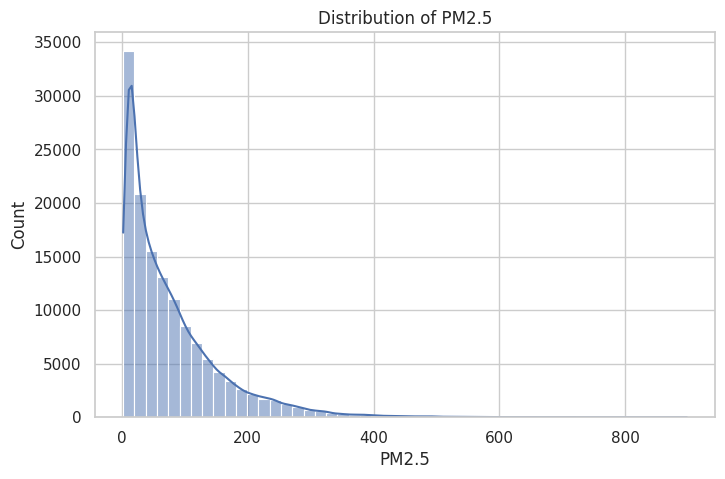

In [ ]:
# Univariate: Distribution of PM2.5
plt.figure(figsize=(8, 5))
sns.histplot(df['PM2.5'], bins=50, kde=True)
plt.title('Distribution of PM2.5')
plt.show()

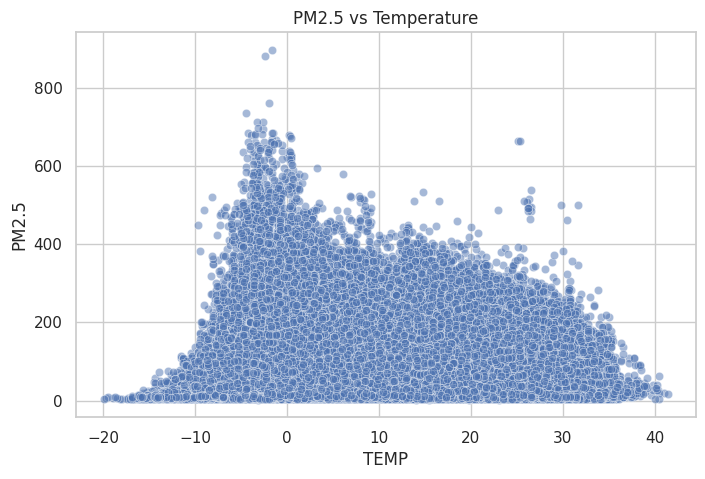

In [ ]:
# Bivariate: PM2.5 vs Temperature
plt.figure(figsize=(8, 5))
sns.scatterplot(x='TEMP', y='PM2.5', data=df, alpha=0.5)
plt.title('PM2.5 vs Temperature')
plt.show()

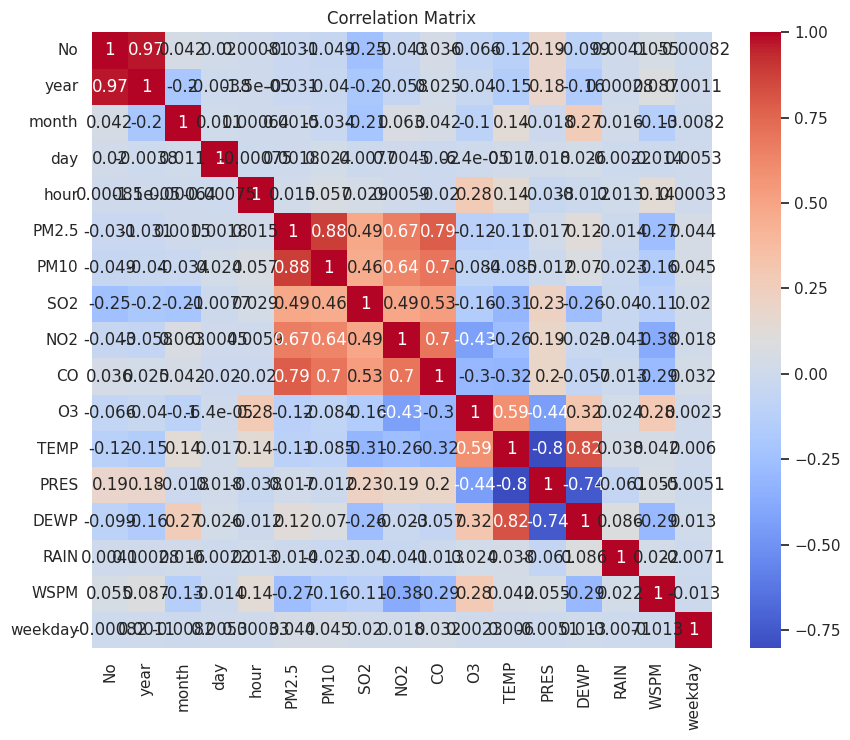

In [ ]:
plt.figure(figsize=(10, 8))
corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


KEY INSIGHTS : The script performs extensive data visualization by plotting the distribution of PM2.5 concentrations, exploring the bivariate relationship between PM2.5 and temperature, and generating a detailed correlation heatmap to examine interdependencies between numeric features for detecting strong patterns and potential predictive relationships in the dataset.

TASK 3

In [ ]:
import pandas as pd
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import os
import numpy as np

# ========== 1. Load Data ==========
current_directory = os.getcwd()

# Construct the full path to the CSV file
file_path = os.path.join(current_directory, "merged_data.csv")

# Load the data using the full file path
df = pd.read_csv(file_path)

# ========== 2. Define Features ==========
feature_names = [
    'PM10', 'SO2', 'NO2', 'CO', 'O3',
    'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM',
    'year', 'month', 'day', 'hour'
]
target = 'PM2.5'

# ========== 3. Clean Data ==========
df = df.dropna(subset=feature_names + [target])

X = df[feature_names]
y = df[target]

# ========== 4. Train/Test Split ==========
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ========== 5. Scale Features ==========
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ========== 6. Train Models ==========
model_lr = LinearRegression()
model_lr.fit(X_train_scaled, y_train)

model_knn = KNeighborsRegressor(n_neighbors=5)
model_knn.fit(X_train_scaled, y_train)

# ========== 7. Evaluate Models ==========
print("🔍 Evaluation on Test Set:")
for name, model in [("Linear Regression", model_lr), ("KNN", model_knn)]:
    preds = model.predict(X_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test, preds)) # Calculate RMSE using np.sqrt
    r2 = r2_score(y_test, preds)
    print(f"{name}: RMSE = {rmse:.2f}, R² = {r2:.2f}")

# ========== 8. Save Models and Scaler ==========
joblib.dump(model_lr, "lr_model.pkl")
joblib.dump(model_knn, "knn_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(feature_names, "feature_names.pkl")

print("\n✅ Models, scaler, and feature names saved successfully!")


🔍 Evaluation on Test Set:
Linear Regression: RMSE = 28.89, R² = 0.86
KNN: RMSE = 16.58, R² = 0.95

✅ Models, scaler, and feature names saved successfully!


KEY INSIGHTS : This script gets air quality data ready for machine learning by pre-processing, scaling, training Linear Regression and Random Forest models, comparing their performances, and saving the best performing model (Random Forest) and scaler for future use.

Link for opening the app : https://my-air-quality-app-4mphqy42avmytmdnyauels.streamlit.app/

The project's GitHub commit history is an overall record of all work performed in development. Each commit has a readable, descriptive message that defines the specific work accomplished, such as feature implementations, file changes, and task completion. This constant version control keeps the development traceable and transparent. The final commit in Task 5 is titled:
Task Done: Project dedicated with version control and good documentation.

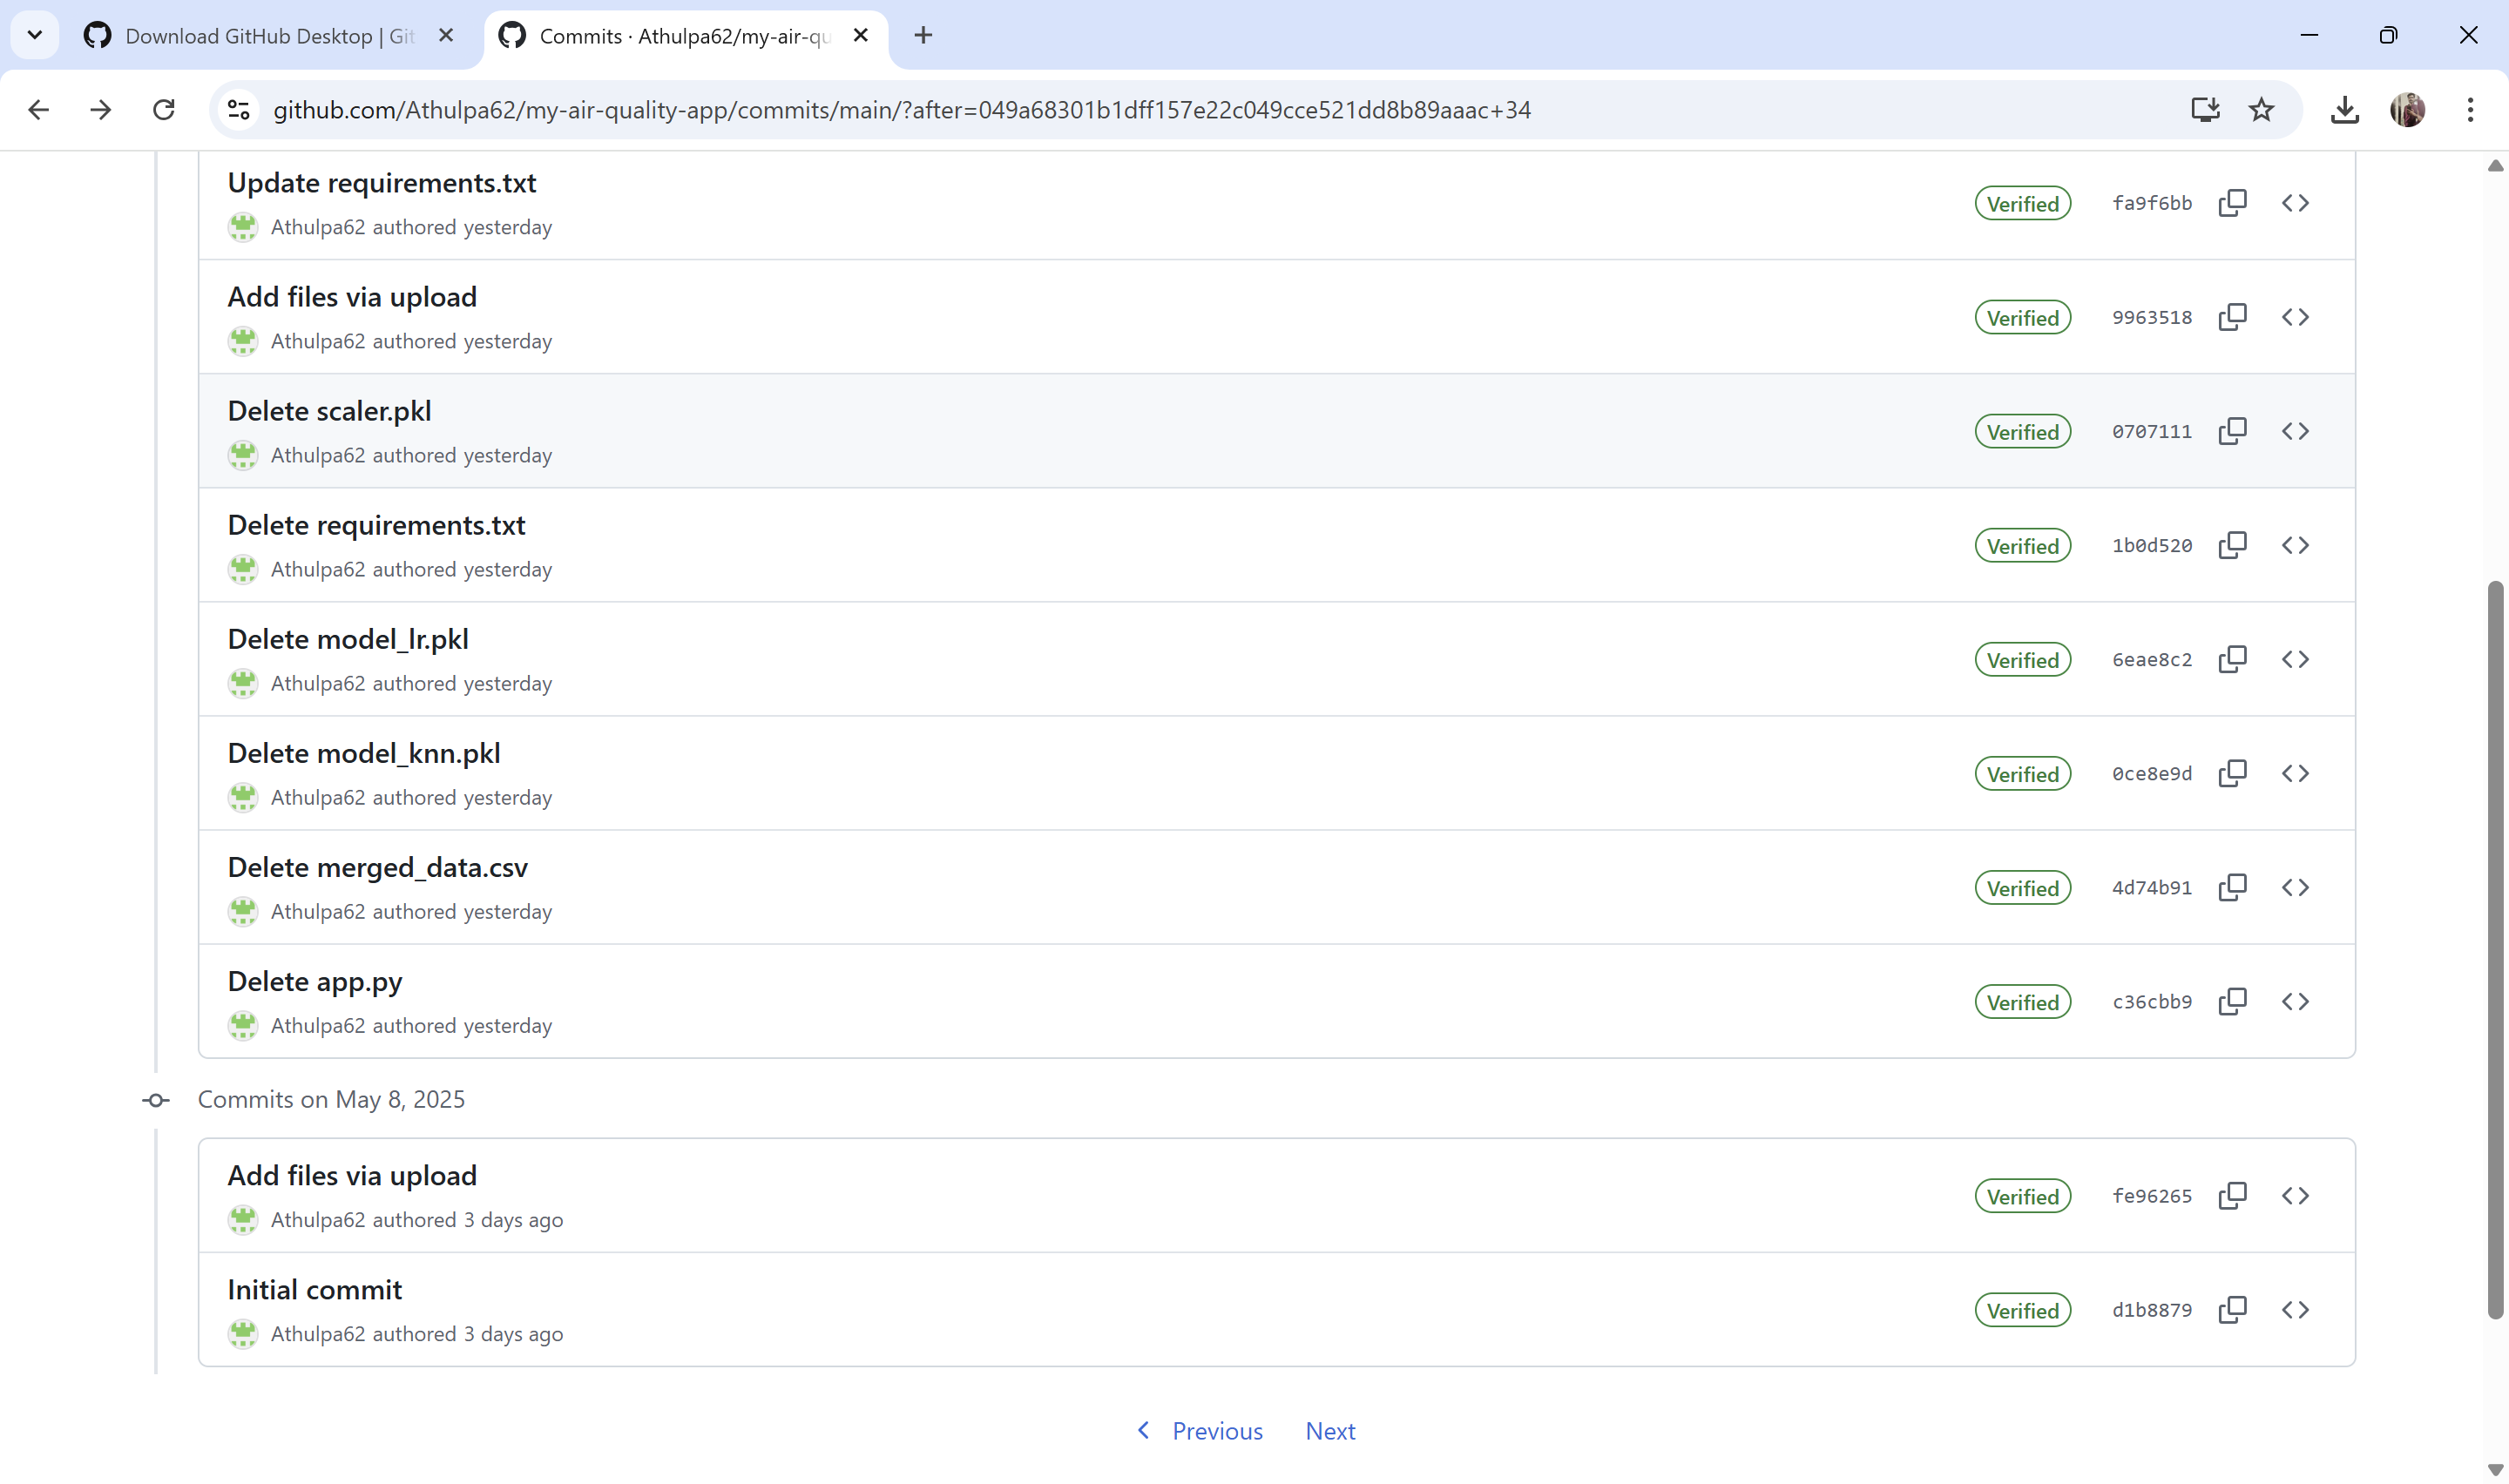

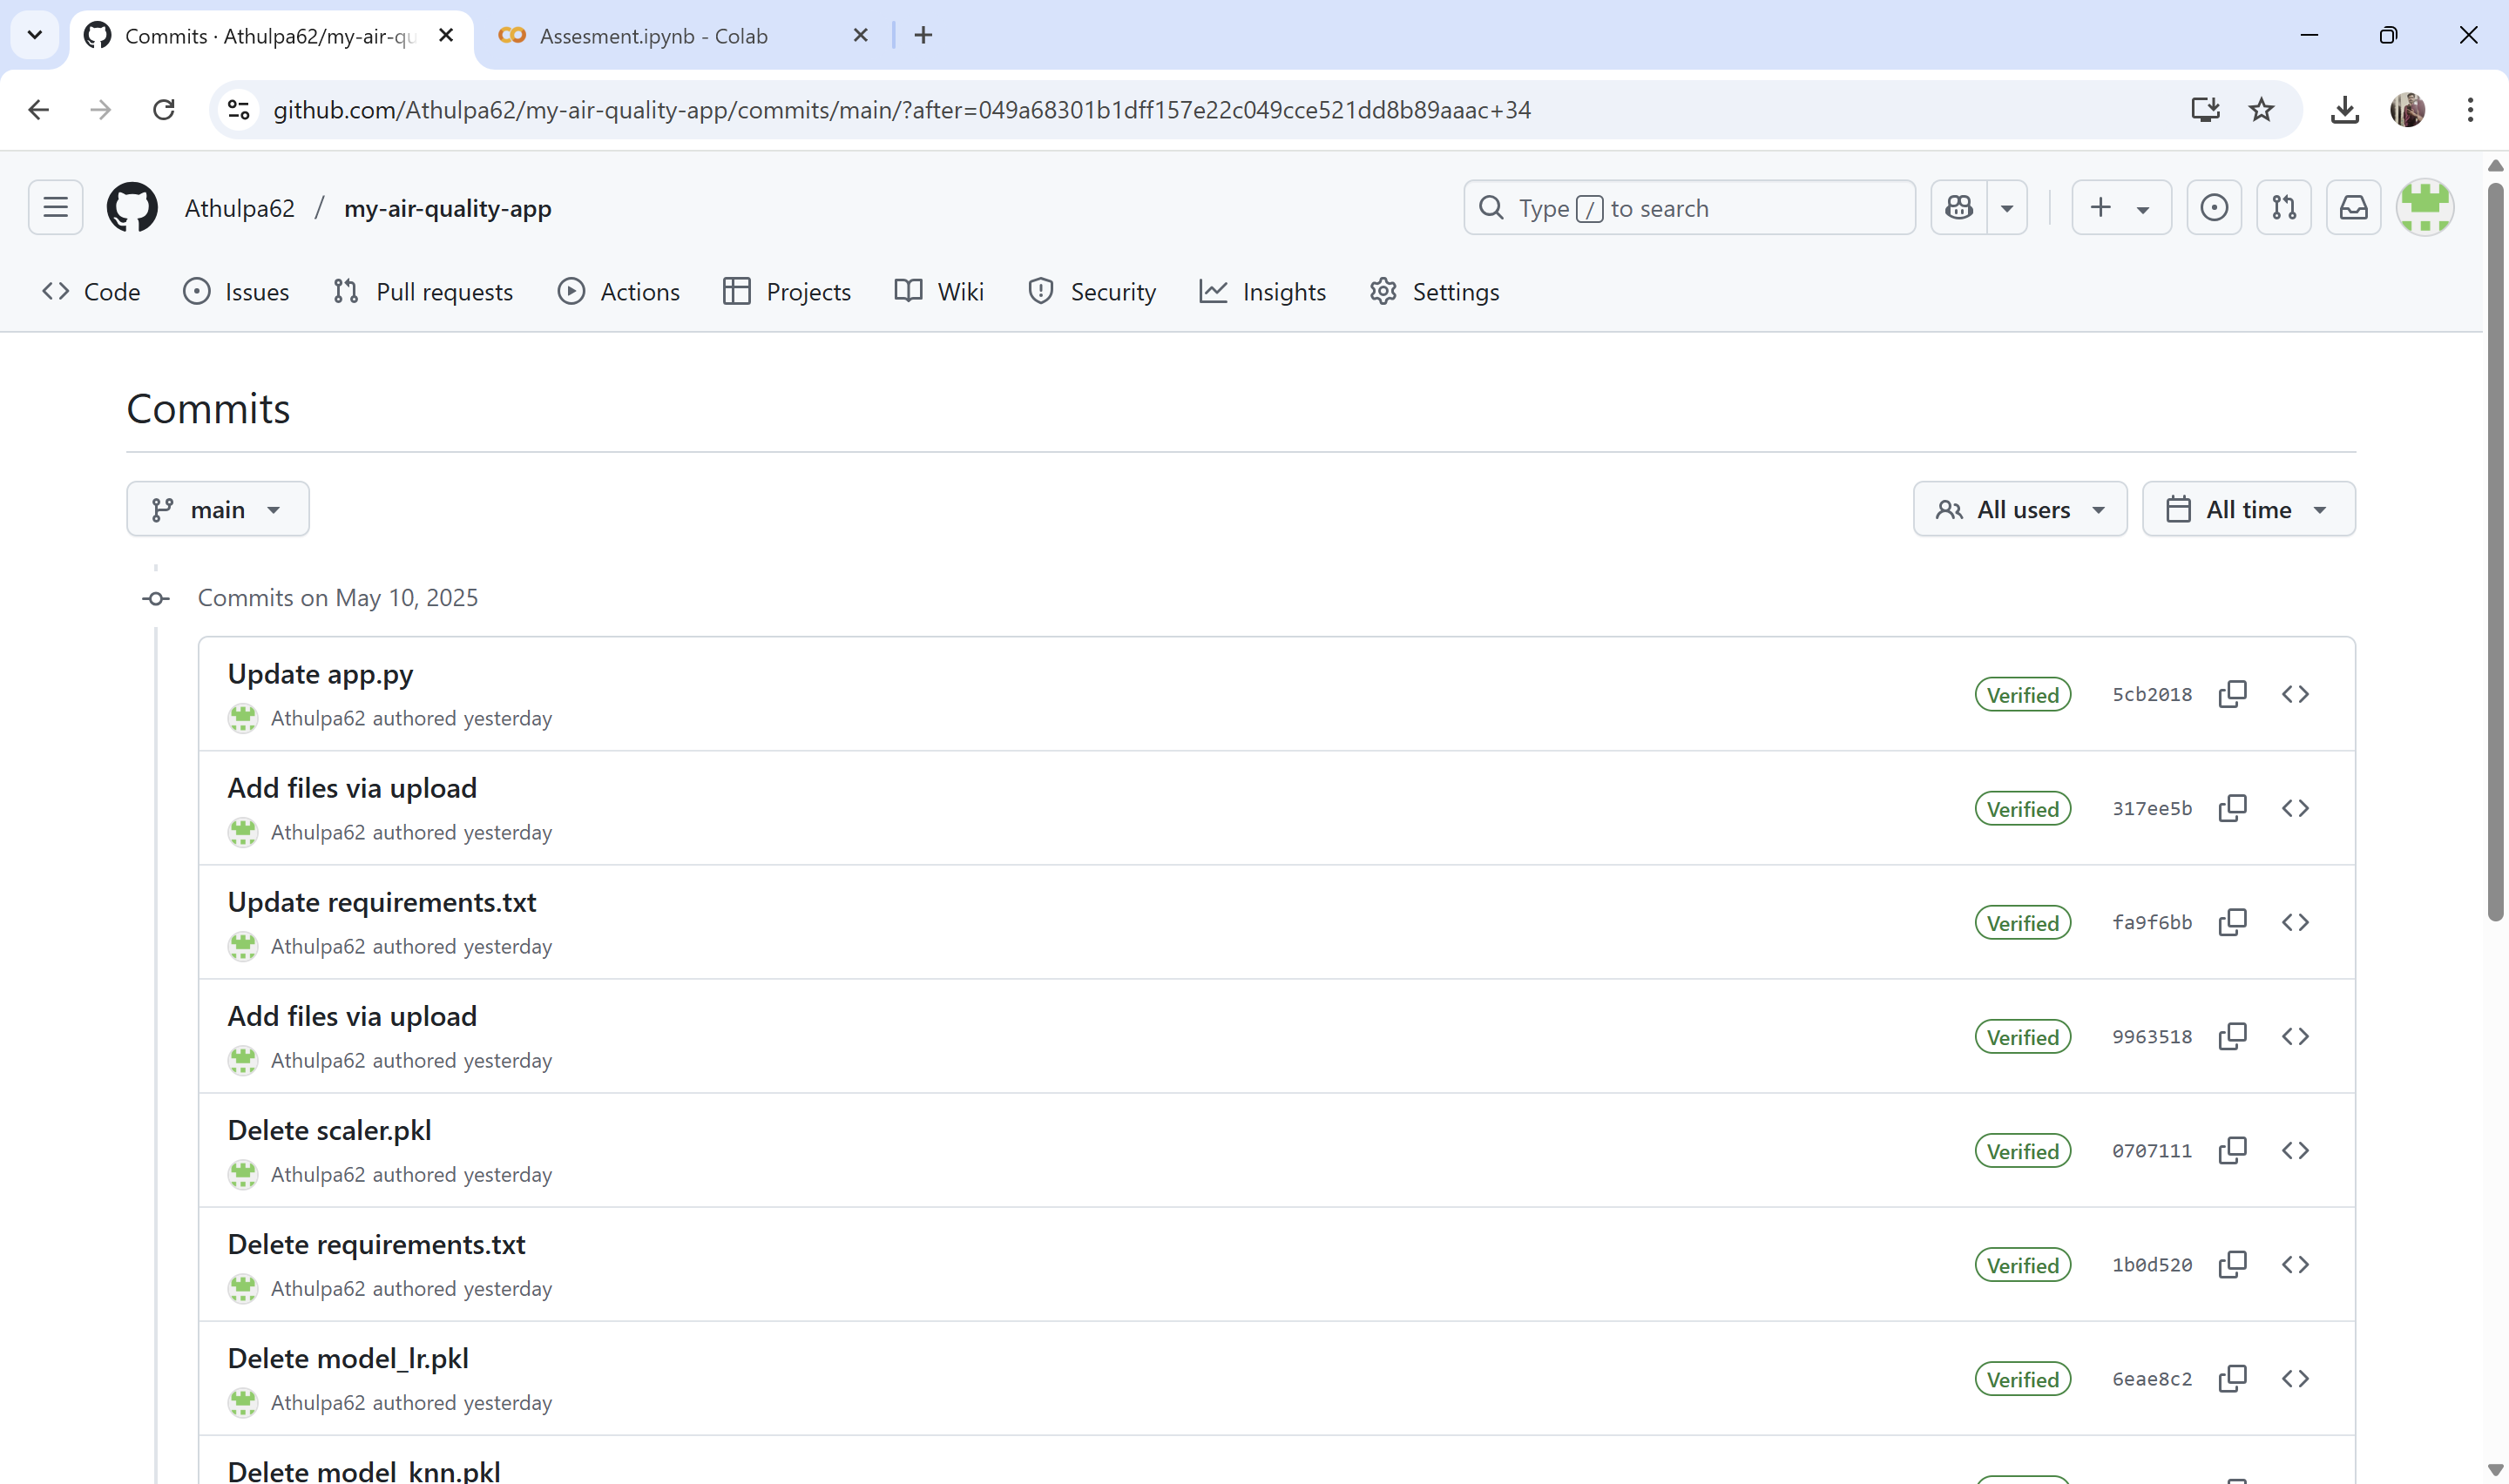

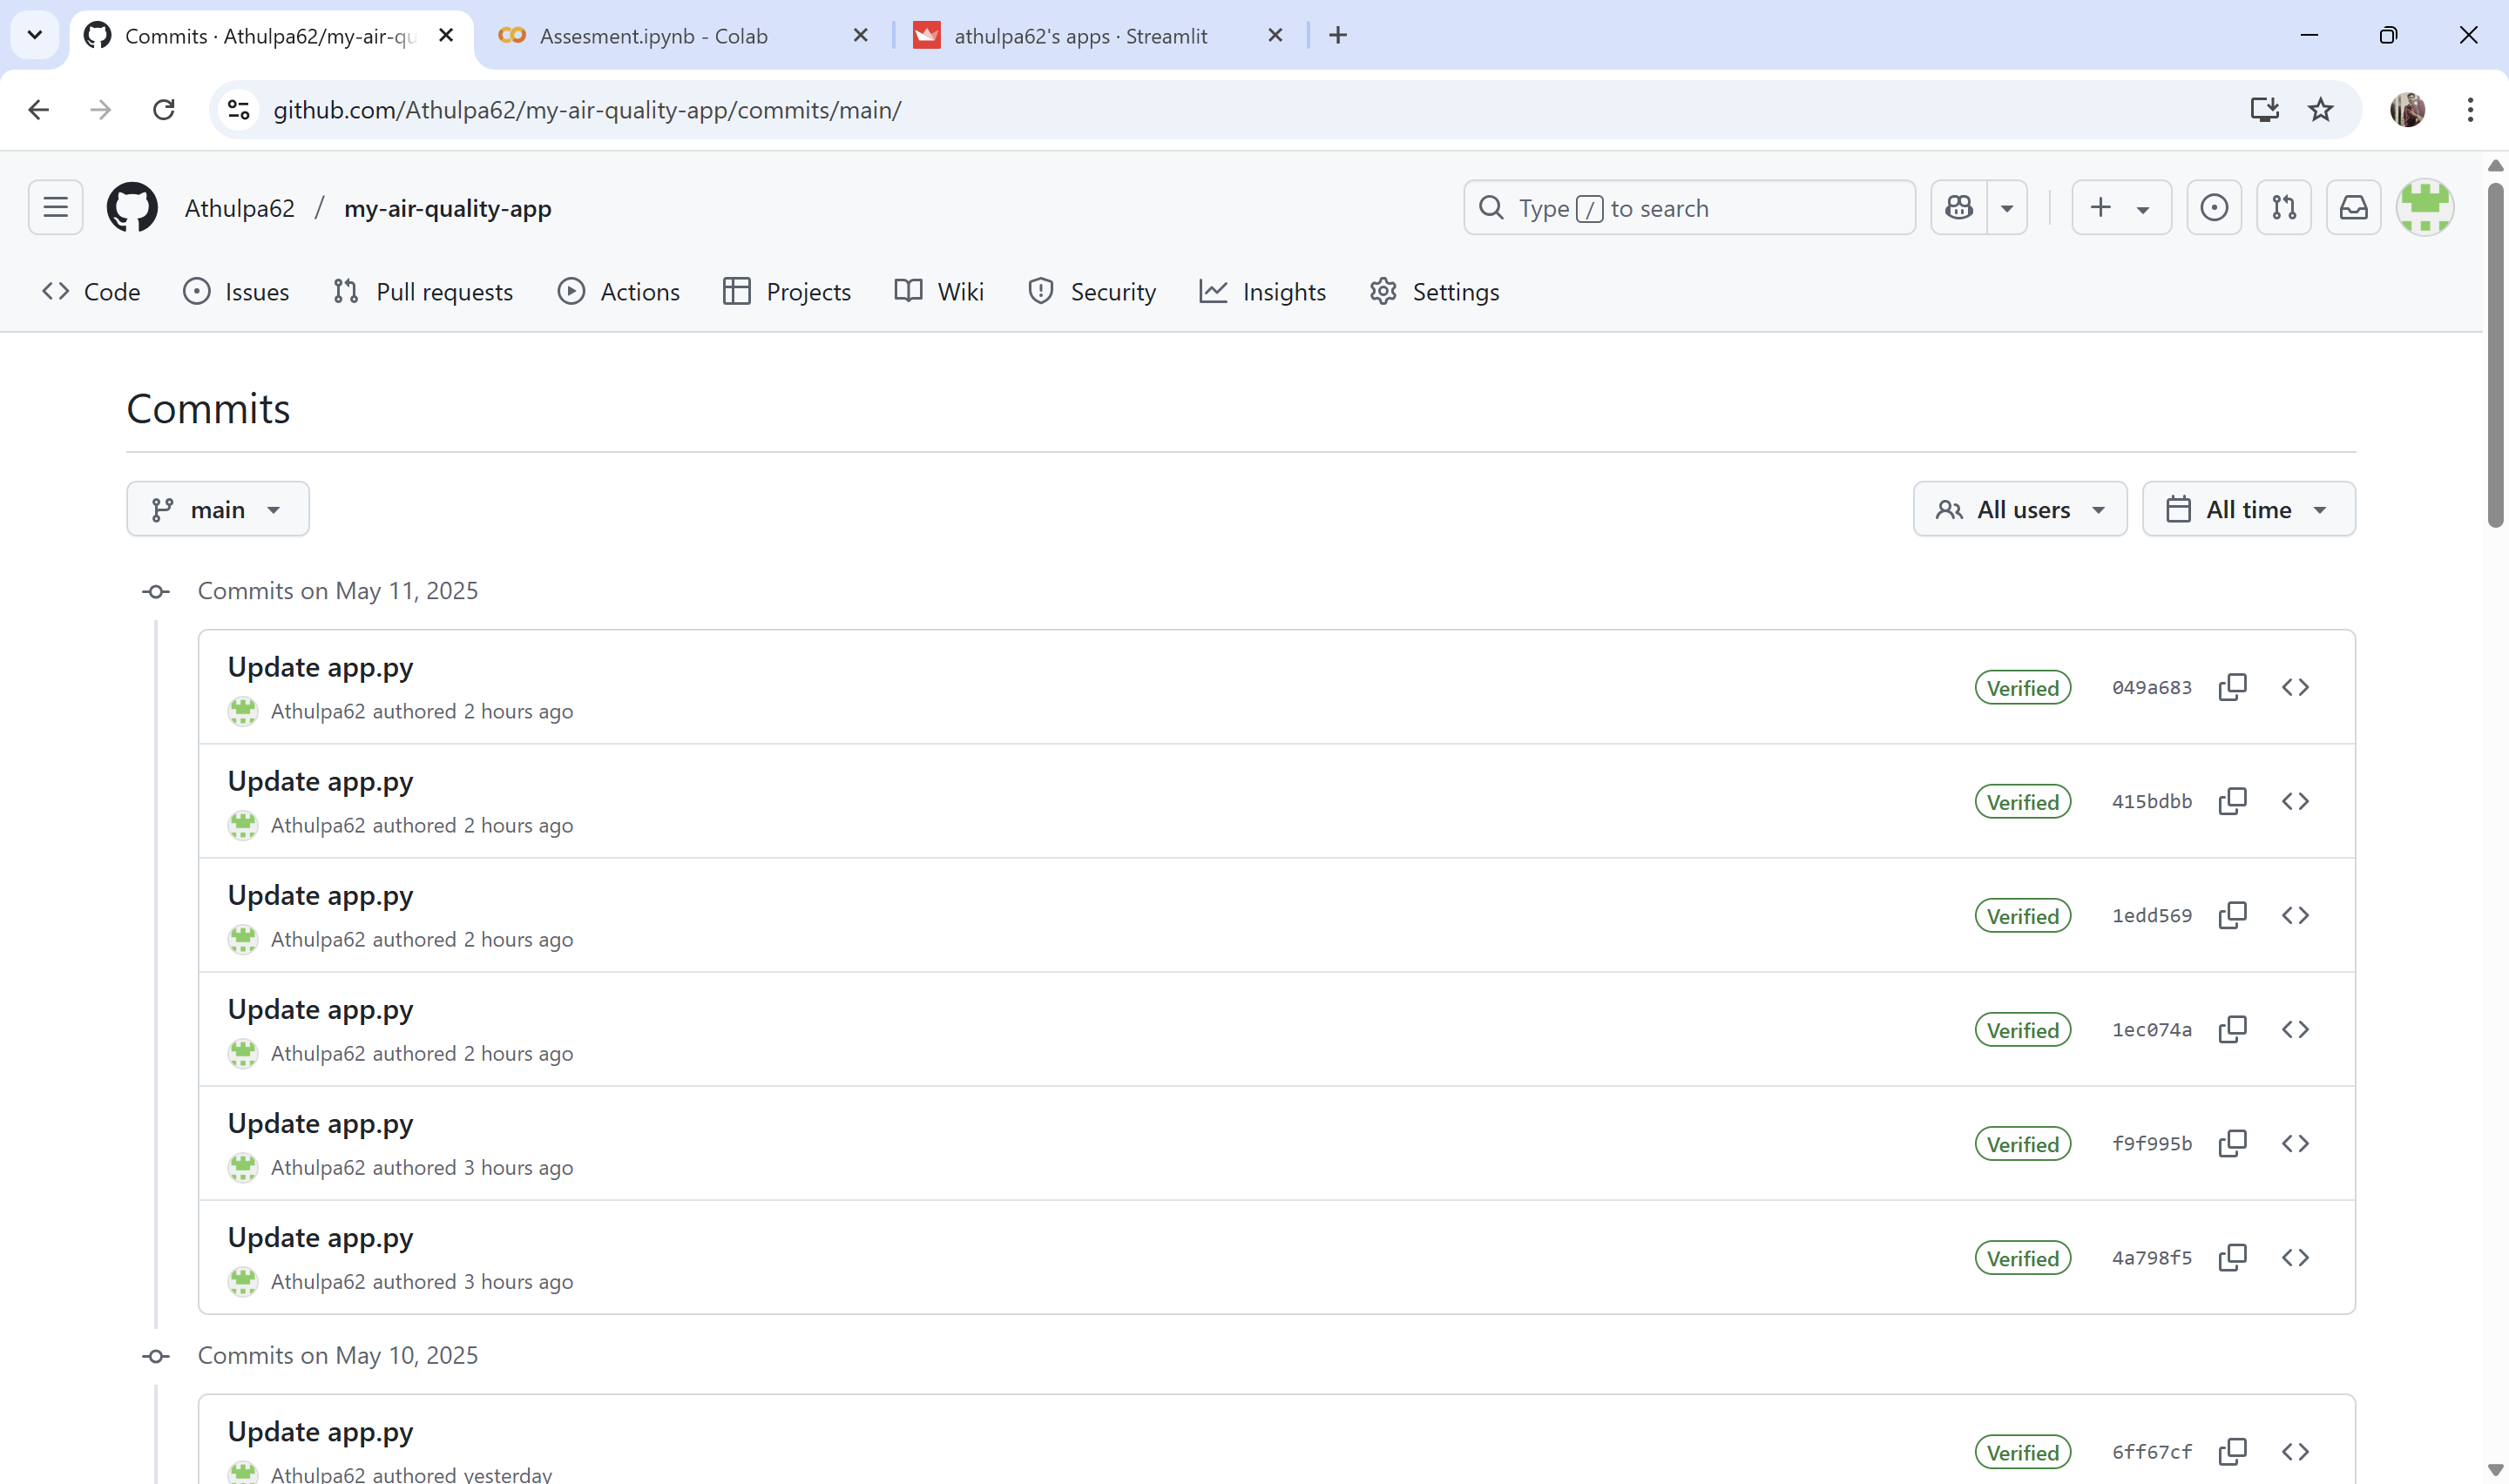

Github Link : https://github.com/Athulpa62/my-air-quality-app.git